# K-Digital Training 7기 최종 프로젝트
## GA4 샘플 데이터 분석을 통한 고객 맞춤 광고 서비스 제안

In [130]:
# 패키지 및 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터셋 확인하기

In [131]:
# 데이터 불러오기

data = pd.read_csv("./SAMPLE.csv", encoding = "cp949")
data.shape

(1001, 14)

In [132]:
data.head()

,NUMBER,name,gender,age,address,phone_num,email,funnel,cart_date,buy_yn,buy_date,Goods,Unnamed: 12,Unnamed: 13
0,1.0,OOO,F,31.0,강원도 홍천군,010-****-****,****@gmail.com,Direct,2022-08-22,Y,2022-08-30,bike,NaN,NaN
1,2.0,OOO,M,48.0,충청남도 공주시,010-****-****,****@gmail.com,Direct,2022-05-09,Y,2022-05-15,T-shirt,NaN,NaN
2,3.0,OOO,M,41.0,강원도 인제군,010-****-****,****@gmail.com,Paid,2022-08-09,Y,2022-09-26,bottle,NaN,NaN
3,4.0,OOO,M,40.0,강원도 철원군,010-****-****,****@gmail.com,Paid,2022-01-06,Y,2022-11-11,bike,NaN,NaN
4,5.0,OOO,M,22.0,경기도 동두천시,010-****-****,****@gmail.com,Paid,2022-11-18,Y,2022-12-20,bottle,NaN,NaN


# 데이터셋 전처리
### 필요한 열(특성)만 남기고 제거하기

In [133]:
# 데이터의 필요한 열(특성)만 남기고 다 제거하기

columns = data.columns
columns

Index(['NUMBER', 'name', 'gender', 'age', 'address', 'phone_num', 'email',
       'funnel', 'cart_date', 'buy_yn', 'buy_date', 'Goods', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [134]:
data.drop(['NUMBER', 'name', 'phone_num', 'email', 'Unnamed: 12', 'Unnamed: 13'], axis = 1, inplace = True)
data

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt
999,F,33.0,강원도 평창군,Cross,2022-10-04,Y,2022-12-08,sticker


# 데이터셋 전처리하기
### 데이터 정보 살피기

In [135]:
# 데이터 셋의 결측치 및 자료형 확인

data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     1000 non-null   object 
 1   age        1000 non-null   float64
 2   address    1000 non-null   object 
 3   funnel     1000 non-null   object 
 4   cart_date  1000 non-null   object 
 5   buy_yn     1000 non-null   object 
 6   buy_date   959 non-null    object 
 7   Goods      959 non-null    object 
dtypes: float64(1), object(7)
memory usage: 62.7+ KB


In [136]:
data.isna().sum()

gender        1
age           1
address       1
funnel        1
cart_date     1
buy_yn        1
buy_date     42
Goods        42
dtype: int64

In [137]:
data.describe()

,age
count,1000.000000
mean,41.698000
std,13.863224
min,18.000000
25%,30.000000
50%,42.000000
75%,54.000000
max,65.000000


# 데이터 전처리하기
### 불필요하게 들어가 있는 마지막 행 제거하기

In [138]:
# 아무런 데이터가 존재하지 않는 마지막 줄 제거하기
# 데이터프레임의 행 수 확인
num_rows = data.shape[0]

# 마지막 행 삭제
data.drop(num_rows - 1, axis=0, inplace=True)
data

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt


# 데이터 전처리하기
### 날짜 문자형에서 날짜형으로 형변환하기
### cart_date와 buy_date 시계열 그래프로 시각화하기

In [143]:
# 장바구니에 넣은 기록이 없는 경우 제거하기

data.dropna(inplace = True)
data

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt


In [145]:
# 결측치 제거 확인

data.isna().sum()

gender       0
age          0
address      0
funnel       0
cart_date    0
buy_yn       0
buy_date     0
Goods        0
dtype: int64

In [146]:
# cart_date와 buy_date를 date 타입으로 형변환

data['cart_date'] = pd.to_datetime(data['cart_date'], format="%Y-%m-%d")
data['buy_date'] = pd.to_datetime(data['buy_date'], format="%Y-%m-%d")

data

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt


In [147]:
# cart_date와 buy_date의 최초 기록과 최근 기록 확인하기

print(data[['cart_date']].min())
print(data[['cart_date']].max())

print(data[['buy_date']].min())
print(data[['buy_date']].max())

cart_date   2022-01-01
dtype: datetime64[ns]
cart_date   2022-12-31
dtype: datetime64[ns]
buy_date   2022-01-22
dtype: datetime64[ns]
buy_date   2022-12-31
dtype: datetime64[ns]


In [148]:
# cart_date와 buy_date 시계열 그래프로 시각화하기
# 원본 데이터 보존을 위한 데이터 프레임 복제

data_copy = pd.DataFrame(data)
data_copy

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt


In [149]:
data_copy

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt


In [150]:
# cart_date 시계열 그래프로 확인하기
# 각 날짜에 장바구니에 담은 횟수 저장하기

daily_counts = data_copy['cart_date'].value_counts()
daily_counts

2022-08-15    8
2022-07-29    7
2022-01-13    7
2022-04-10    6
2022-02-07    6
             ..
2022-09-29    1
2022-05-12    1
2022-05-16    1
2022-09-10    1
2022-10-04    1
Name: cart_date, Length: 339, dtype: int64

In [151]:
# 장바구니에 담은 횟수 데이터 프레임으로 나타내기

daily_count_df = pd.DataFrame({'cart_date': daily_counts.index, 'count': daily_counts.values})
daily_count_df

,cart_date,count
0,2022-08-15,8
1,2022-07-29,7
2,2022-01-13,7
3,2022-04-10,6
4,2022-02-07,6
...,...,...
334,2022-09-29,1
335,2022-05-12,1
336,2022-05-16,1
337,2022-09-10,1


In [152]:
# cart_date 열을 기준으로 정렬한 후, 인덱스 초기화하기

daily_count_df.sort_values(by = 'cart_date', inplace = True)
daily_count_df.reset_index(drop = True, inplace = True)
daily_count_df

,cart_date,count
0,2022-01-01,1
1,2022-01-02,3
2,2022-01-03,4
3,2022-01-04,3
4,2022-01-06,4
...,...,...
334,2022-12-27,3
335,2022-12-28,2
336,2022-12-29,4
337,2022-12-30,3


In [153]:
# 시계열 그래프 작성을 위한 cart_date의 데이터 타입 확인
# cart_date의 데이터 타입이 date가 아닌 경우 to_datetime을 활용하여 date 타입으로 형변환

daily_count_df['cart_date'].dtype

dtype('<M8[ns]')

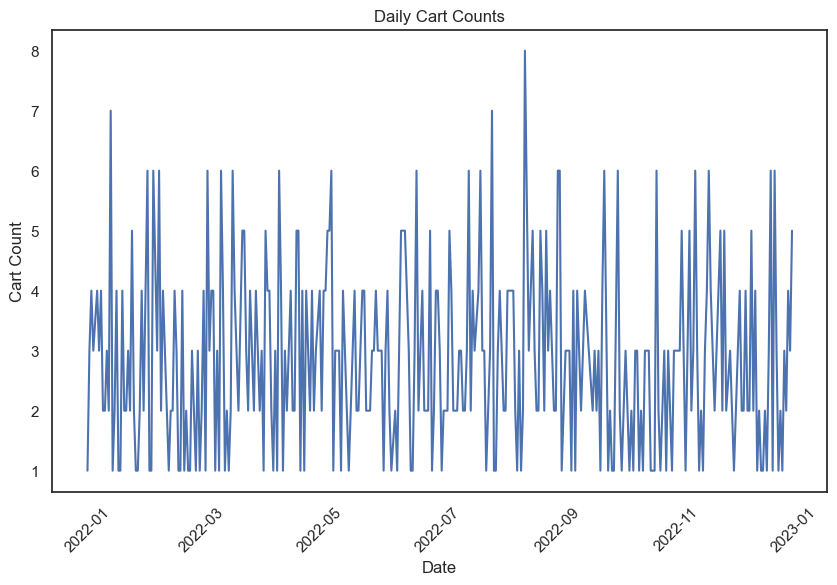

In [154]:
# 날짜별로 장바구니에 담은 고객의 수 시계열 그래프로 그리기

daily_count_df.set_index("cart_date", inplace = True)

plt.figure(figsize=(10, 6))
plt.plot(daily_count_df.index, daily_count_df['count'])
plt.title('Daily Cart Counts')
plt.xlabel('Date')
plt.ylabel('Cart Count')
plt.xticks(rotation=45)
plt.show()


In [155]:
# 원본 데이터 보존을 위한 데이터 프레임 복제

data_copy = pd.DataFrame(data)
data_copy

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt


In [156]:
# buy_date 시계열 그래프로 확인하기
# 각 날짜에 고객이 구매한 횟수 저장하기

daily_counts = data_copy['buy_date'].value_counts()
daily_counts

2022-12-31    21
2022-12-29    20
2022-11-27    14
2022-12-26    13
2022-12-19    13
              ..
2022-05-01     1
2022-03-09     1
2022-09-13     1
2022-03-11     1
2022-06-07     1
Name: buy_date, Length: 271, dtype: int64

In [157]:
# 구매한 횟수 데이터 프레임으로 나타내기

daily_count_df = pd.DataFrame({'buy_date': daily_counts.index, 'count': daily_counts.values})
daily_count_df

,buy_date,count
0,2022-12-31,21
1,2022-12-29,20
2,2022-11-27,14
3,2022-12-26,13
4,2022-12-19,13
...,...,...
266,2022-05-01,1
267,2022-03-09,1
268,2022-09-13,1
269,2022-03-11,1


In [158]:
# buy_date 열을 기준으로 정렬한 후, 인덱스 초기화하기

daily_count_df.sort_values(by = 'buy_date', inplace = True)
daily_count_df.reset_index(drop = True, inplace = True)
daily_count_df

,buy_date,count
0,2022-01-22,1
1,2022-01-24,1
2,2022-01-26,1
3,2022-01-30,1
4,2022-01-31,1
...,...,...
266,2022-12-27,11
267,2022-12-28,9
268,2022-12-29,20
269,2022-12-30,12


In [159]:
# 시계열 그래프 작성을 위한 buy_date 데이터 타입 확인
# buy_date 데이터 타입이 date가 아닌 경우 to_datetime을 활용하여 date 타입으로 형변환

daily_count_df['buy_date'].dtype

dtype('<M8[ns]')

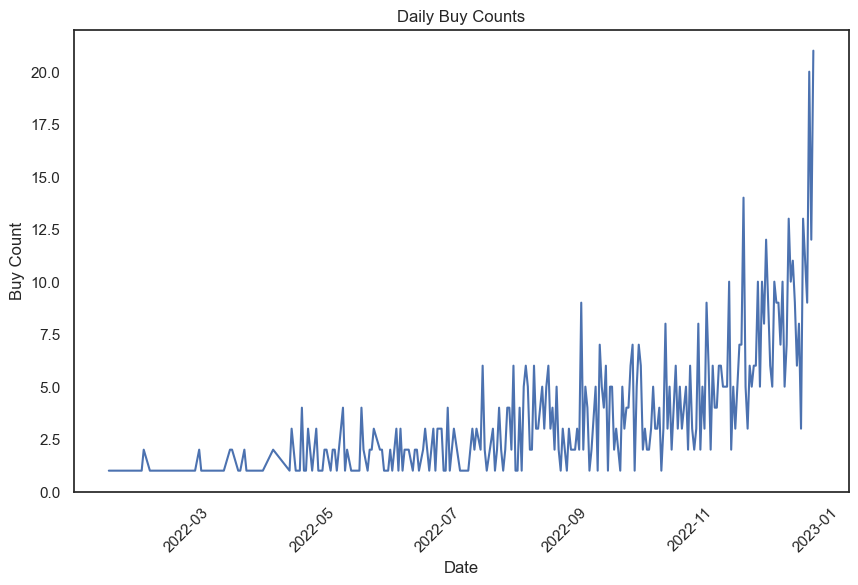

In [160]:
# 날짜별로 구매한 고객의 수 시계열 그래프로 그리기

daily_count_df.set_index("buy_date", inplace = True)

plt.figure(figsize=(10, 6))
plt.plot(daily_count_df.index, daily_count_df['count'])
plt.title('Daily Buy Counts')
plt.xlabel('Date')
plt.ylabel('Buy Count')
plt.xticks(rotation=45)
plt.show()


# 데이터 전처리하기
### 장바구니 담기부터 구매까지 걸린 시간 분석하기

In [27]:
data

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt


In [28]:
# 장바구니 담기부터 구매까지 걸린 시간(일) 구하기

data['date_diff'] = (data['buy_date'] - data['cart_date']).dt.days

data

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods,date_diff
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike,8
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt,6
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle,48
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike,309
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle,32
...,...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt,212
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen,1
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen,6
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt,160


In [29]:
# date_diff 값의 개수 확인해보기

data['date_diff'].value_counts()

0      22
2      15
5      14
1      14
15     13
       ..
295     1
228     1
246     1
258     1
160     1
Name: date_diff, Length: 269, dtype: int64

In [30]:
# date_diff 히스토그램으로 시각화하기

data_date_diff = pd.DataFrame(data)
data_date_diff

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods,date_diff
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike,8
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt,6
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle,48
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike,309
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle,32
...,...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt,212
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen,1
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen,6
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt,160


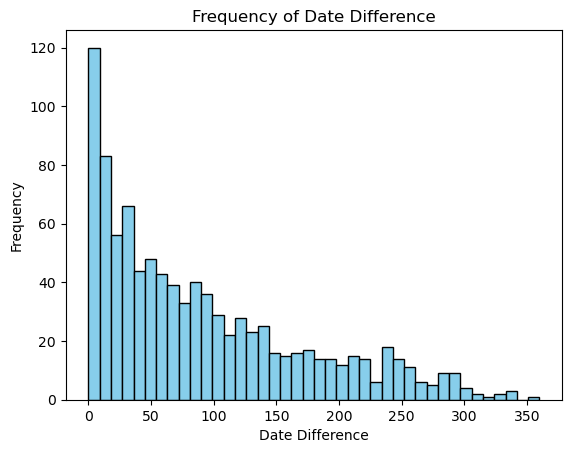

In [31]:
plt.hist(data['date_diff'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Date Difference')
plt.ylabel('Frequency')
plt.title('Frequency of Date Difference')
plt.show()

In [32]:
# date_diff 분석을 통하여 적절한 장바구니 보관일 구하기

data['date_diff'].describe()

count    959.000000
mean      90.770594
std       81.952450
min        0.000000
25%       23.000000
50%       67.000000
75%      138.000000
max      360.000000
Name: date_diff, dtype: float64

In [33]:
# 물품별 date_diff 분석을 통하여 적절한 장바구니 보관일 구하기

data.groupby('Goods')['date_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
Goods,,,,,,,,
T-shirt,187.0,92.443850,81.839476,0.0,25.0,71.0,140.00,304.0
bike,144.0,90.208333,85.867916,0.0,20.0,69.5,135.25,340.0
bottle,146.0,93.116438,85.826168,0.0,23.0,60.5,157.75,334.0
notebook,160.0,91.268750,82.984785,0.0,28.0,64.0,138.75,360.0
pen,149.0,86.879195,77.121693,0.0,17.0,67.0,133.00,304.0
sticker,173.0,90.341040,79.495608,0.0,26.0,68.0,121.00,336.0


# 데이터 전처리하기
### 굿즈 분석하기

In [34]:
categories = ["T-shirt", "bike", "bottle", "notebook", "pen", "sticker"]
goods = data['Goods'].value_counts()

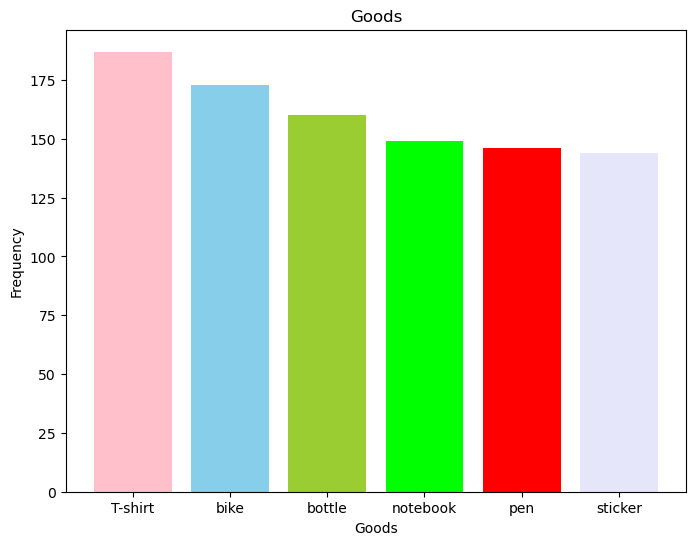

In [35]:
plt.figure(figsize = (8, 6))

plt.bar(categories, goods, color = ["pink", "skyblue", "yellowgreen", "lime", "red", "lavender"])
plt.title("Goods")
plt.xlabel("Goods")
plt.ylabel("Frequency")
plt.show()

# 데이터셋 전처리하기
### 연령 분석하기

In [36]:
# age 분석하기

data['age'].describe()

count    959.000000
mean      41.564129
std       13.800994
min       18.000000
25%       30.000000
50%       42.000000
75%       53.000000
max       65.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

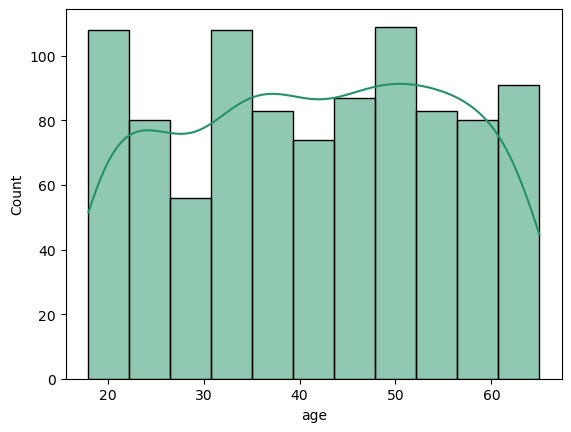

In [37]:
# 

sns.set_palette("summer")
sns.histplot(x = 'age', data = data, kde = True)

# 데이터셋 전처리하기
### 성별 분석하기

In [38]:
data['gender'].value_counts()

F    485
M    474
Name: gender, dtype: int64

In [39]:
female = data['gender'].value_counts()[0]
male = data['gender'].value_counts()[1]

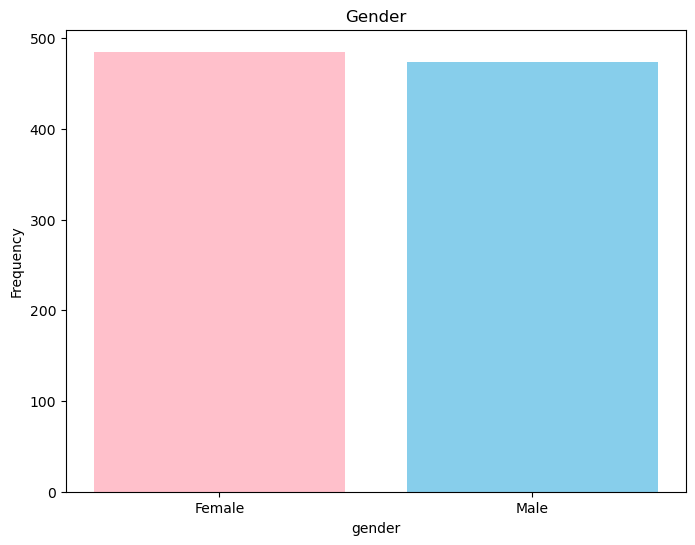

In [40]:
plt.figure(figsize = (8, 6))
categories = ["Female", "Male"]
gender = [female, male]


plt.bar(categories, gender, color = ["pink", "skyblue"])
plt.title("Gender")
plt.xlabel("gender")
plt.ylabel("Frequency")
plt.show()

In [41]:
data.loc[:, 'gender'] = data.loc[:, 'gender'].replace('F', 1)
data.loc[:, 'gender'] = data.loc[:, 'gender'].replace('M', 2)

data

C:\Users\user\AppData\Local\Temp\ipykernel_7268\2705727806.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'gender'] = data.loc[:, 'gender'].replace('M', 2)


,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods,date_diff
0,1,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike,8
1,2,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt,6
2,2,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle,48
3,2,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike,309
4,2,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle,32
...,...,...,...,...,...,...,...,...,...
995,1,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt,212
996,2,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen,1
997,2,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen,6
998,2,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt,160


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   gender     959 non-null    int64         
 1   age        959 non-null    float64       
 2   address    959 non-null    object        
 3   funnel     959 non-null    object        
 4   cart_date  959 non-null    datetime64[ns]
 5   buy_yn     959 non-null    object        
 6   buy_date   959 non-null    datetime64[ns]
 7   Goods      959 non-null    object        
 8   date_diff  959 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 74.9+ KB


# 데이터셋 전처리하기
### 주소(시) 분리하기

In [43]:
data['address'].value_counts()

경기도 의왕시     12
충청남도 서천군    12
강원도 평창군     11
전라남도 완도군    11
경기도 양평군     11
            ..
강원도 고성군      2
경상북도 구미시     1
강원도 동해시      1
경기도 광명시      1
강원도 정선군      1
Name: address, Length: 161, dtype: int64

<Axes: xlabel='count', ylabel='address'>

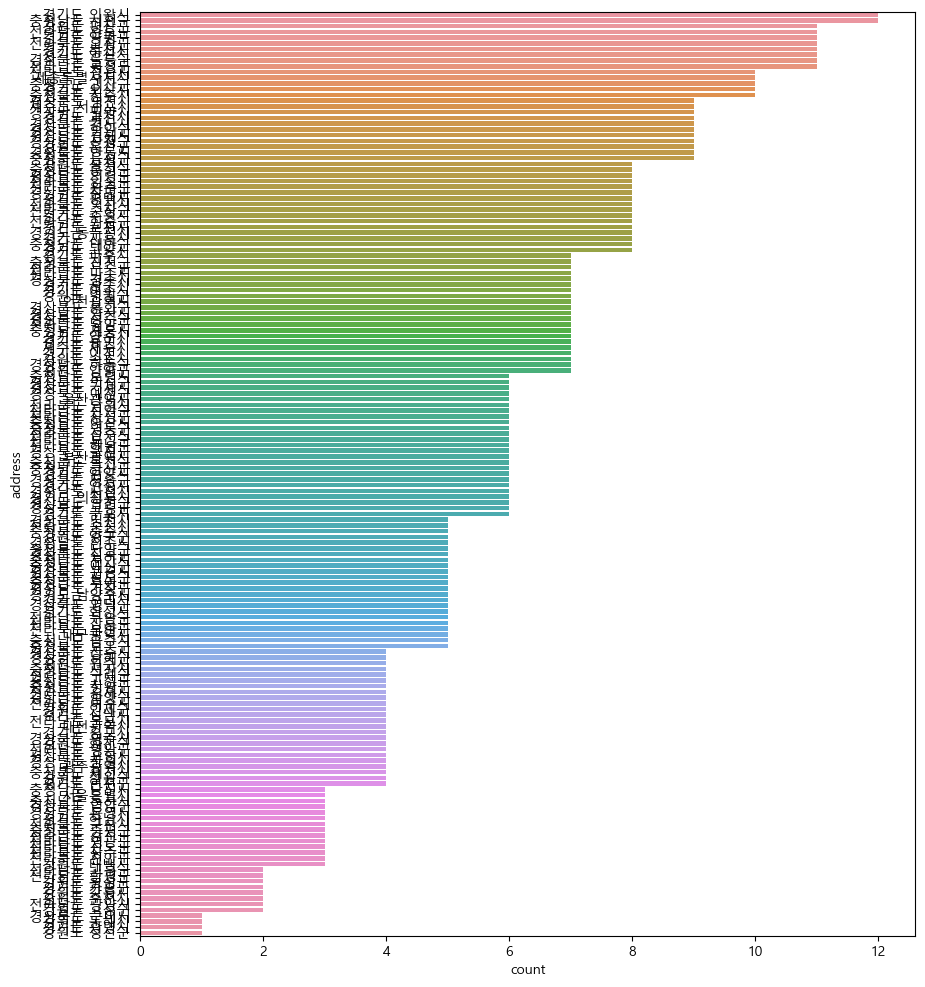

In [44]:
plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize = (10, 12))
sns.countplot(y = 'address', data = data,
             order = data['address'].value_counts().index)

In [45]:
for i, j in data:
    print(i)

ValueError: too many values to unpack (expected 2)

In [ ]:
data['do'] = np.nan
data['si'] = np.nan

special = ['서울특별시', '세종특별자치시', '인천광역시', '대전광역시']

for index, row in data.iterrows():
    address = row['address']
    parts = address.split(' ')
    
    if parts[0] in special:
        data.at[index, 'do'] = parts[0]
        data.at[index, 'si'] = parts[0]
        
    else:
        data.at[index, 'do'] = parts[0]
        if len(parts) > 1:
            data.at[index, 'si'] = parts[1]

data.drop(['address'], axis=1, inplace=True)
data

# 데이터셋 전처리하기
### 접속 경로 분석하기

In [46]:
data['funnel'].value_counts()

Cross      250
Organic    242
Paid       234
Direct     233
Name: funnel, dtype: int64

<Axes: xlabel='funnel', ylabel='count'>

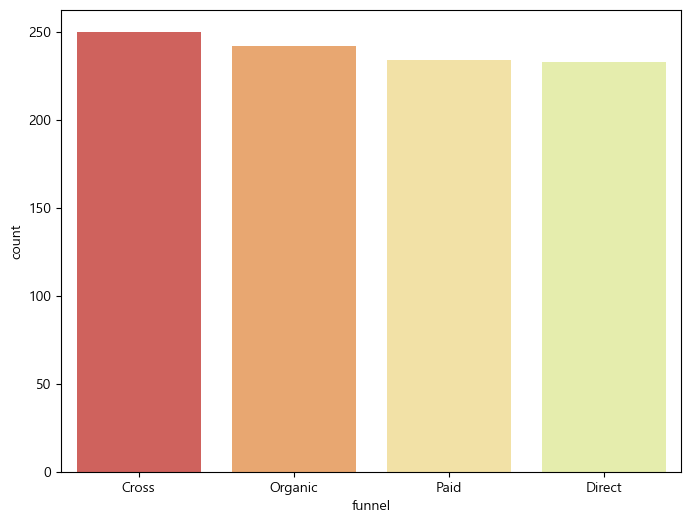

In [47]:
fig = plt.figure(figsize = (8, 6))
sns.set_palette("Spectral")
sns.countplot(x = 'funnel', data = data,
             order = data['funnel'].value_counts().index)

# 상관분석
### 

C:\Users\user\AppData\Local\Temp\ipykernel_7268\1873312985.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53944 (

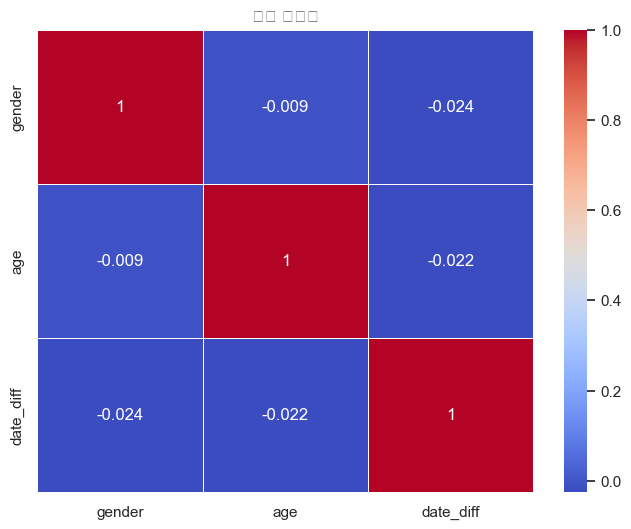

In [48]:
# 상관 계수 행렬 계산
correlation_matrix = data.corr()

# Seaborn을 사용하여 히트맵 그리기
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("상관 히트맵")
plt.show()

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [266]:
df = pd.read_csv("./SAMPLE.csv", encoding = "cp949")

In [267]:
df.drop(['NUMBER', 'name', 'phone_num', 'email',
        'Unnamed: 12','Unnamed: 13'], axis = 1, inplace = True)

num_rows = df.shape[0]
df.drop(num_rows - 1, axis=0, inplace=True)
df

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,bike
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,T-shirt
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,bottle
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,bike
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,bottle
...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,T-shirt
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,pen
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,pen
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,T-shirt


In [268]:
df['buy_event'] = (df['buy_yn'] == 'Y').astype(int)
df.drop(['buy_yn'], axis=1, inplace=True)

In [269]:
df.shape

(1000, 8)

In [270]:
df['buy_date'] = pd.to_datetime(df['buy_date'], errors='coerce')
df['cart_date'] = pd.to_datetime(df['cart_date'], errors='coerce')
df['date_diff'] = (df['buy_date'] - df['cart_date']).dt.days
df['date_diff'] = df['date_diff'].fillna(0).astype(int)

In [272]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [273]:
# 'date_diff'와 'age' 열을 선택
X_num = df[['date_diff', 'age']]

# StandardScaler를 초기화하고 데이터를 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# 표준화된 데이터로 DataFrame을 업데이트
df[['date_diff', 'age']] = X_scaled

In [289]:
# 'funnel' 열의 값을 숫자로 매핑하는 딕셔너리 생성
funnel_mapping = {'Direct': 1, 'Cross': 2, 'Paid': 3, 'Organic': 4}

# 'funnel_mapped' 열 생성
data['funnel_num'] = data['funnel'].map(funnel_mapping)

data.drop(['funnel'], axis=1, inplace=True)

# 결과 확인
data

,gender,age,address,cart_date,buy_yn,buy_date,buy_event,goods_num,funnel_num
0,F,31.0,강원도 홍천군,2022-08-22,Y,2022-08-30,1,1,1
1,M,48.0,충청남도 공주시,2022-05-09,Y,2022-05-15,1,6,1
2,M,41.0,강원도 인제군,2022-08-09,Y,2022-09-26,1,2,3
3,M,40.0,강원도 철원군,2022-01-06,Y,2022-11-11,1,1,3
4,M,22.0,경기도 동두천시,2022-11-18,Y,2022-12-20,1,2,3
...,...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,2022-02-16,Y,2022-09-16,1,6,2
996,M,48.0,부산광역시,2022-12-28,Y,2022-12-29,1,4,1
997,M,37.0,경상남도 창녕군,2022-10-08,Y,2022-10-14,1,4,2
998,M,22.0,전라북도 익산시,2022-02-09,Y,2022-07-19,1,6,2


In [288]:
# 'goods' 열의 값을 숫자로 매핑하는 딕셔너리 생성
goods_mapping = {'bike': 1, 'bottle': 2, 'notebook': 3,
                 'pen': 4, 'sticker': 5, 'T-shirt': 6}

# 'goods_num' 열 생성
data['goods_num'] = data['Goods'].map(goods_mapping)

data.drop(['Goods'], axis=1, inplace=True)

# 결과 확인
data

,gender,age,address,funnel,cart_date,buy_yn,buy_date,buy_event,goods_num
0,F,31.0,강원도 홍천군,Direct,2022-08-22,Y,2022-08-30,1,1
1,M,48.0,충청남도 공주시,Direct,2022-05-09,Y,2022-05-15,1,6
2,M,41.0,강원도 인제군,Paid,2022-08-09,Y,2022-09-26,1,2
3,M,40.0,강원도 철원군,Paid,2022-01-06,Y,2022-11-11,1,1
4,M,22.0,경기도 동두천시,Paid,2022-11-18,Y,2022-12-20,1,2
...,...,...,...,...,...,...,...,...,...
995,F,64.0,충청남도 공주시,Cross,2022-02-16,Y,2022-09-16,1,6
996,M,48.0,부산광역시,Direct,2022-12-28,Y,2022-12-29,1,4
997,M,37.0,경상남도 창녕군,Cross,2022-10-08,Y,2022-10-14,1,4
998,M,22.0,전라북도 익산시,Cross,2022-02-09,Y,2022-07-19,1,6


In [320]:
X_num = df[['date_diff', 'age', 'gender']]
X_cat = df[['funnel_num','goods_num']]
y = df['buy_event']

In [321]:
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)


In [323]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [325]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [326]:
model_xgb.feature_importances_

array([0.05431299, 0.        , 0.        , 0.        , 0.945687  ],
      dtype=float32)

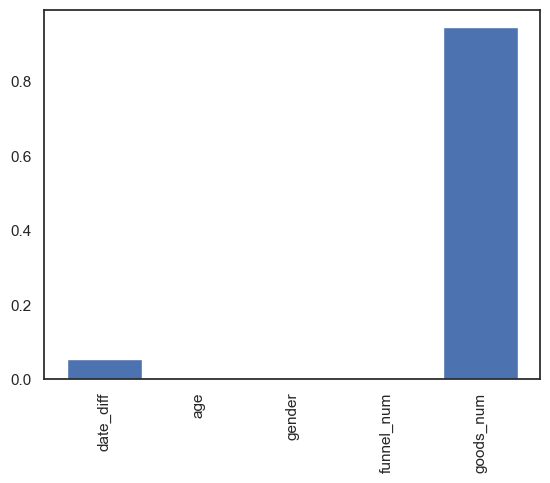

In [330]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [331]:
from sklearn.metrics import classification_report